# Spark notebook

In [1]:
#importing the necessary libraries and packages
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql import functions as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.types import *
from pyspark.sql.functions import *  


In [2]:
#creating a spark context object
spark = (SparkSession.builder.appName("sachin_ml")\
        .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
        .enableHiveSupport().getOrCreate())
spark

In [3]:
#using the 'sachinlabs' database and displaying the tables presnt in he database via spark sql
spark.sql("use sachinlabs").show()
spark.sql("show tables").show()

++
||
++
++

+----------+------------+-----------+
|  database|   tableName|isTemporary|
+----------+------------+-----------+
|sachinlabs| departments|      false|
|sachinlabs|    dept_emp|      false|
|sachinlabs|dept_manager|      false|
|sachinlabs|   employees|      false|
|sachinlabs|    salaries|      false|
|sachinlabs|      titles|      false|
+----------+------------+-----------+



In [4]:
#viewing first few records of the departments table
spark.sql("select * from departments").show()


+-------+--------------------+
|dept_no|           dept_name|
+-------+--------------------+
|dept_no|           dept_name|
|   d001|         "Marketing"|
|   d002|           "Finance"|
|   d003|   "Human Resources"|
|   d004|        "Production"|
|   d005|       "development"|
|   d006|"Quality Management"|
|   d007|             "Sales"|
|   d008|          "Research"|
|   d009|  "Customer Service"|
+-------+--------------------+



In [5]:
#viewing first few records of the employees table
spark.sql("select * from employees limit 10").show()

+------+------------+----------+----------+---------+---+----------+--------------+-----------------------+----+---------+
|emp_no|emp_title_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|last_performance_rating|left|last_date|
+------+------------+----------+----------+---------+---+----------+--------------+-----------------------+----+---------+
|  null|emp_title_id|birth_date|first_name|last_name|sex| hire_date|          null|   Last_performance_...|null|last_date|
|473302|       s0001| 7/25/1953|  Hideyuki| Zallocco|  M| 4/28/1990|             2|                      A|null|         |
|475053|       e0002|11/18/1954|     Byong|Delgrande|  F|  9/7/1991|             1|                      C|null|         |
| 57444|       e0002| 1/30/1958|     Berry|     Babb|  F| 3/21/1992|             9|                      A|null|         |
|421786|       s0001| 9/28/1957|     Xiong| Verhoeff|  M|11/26/1987|             2|                      C|null|         |
|282238|       e

## Spark EDA

A list showing employee number, last name, first name, sex, and salary for each employee1.

In [6]:
spark.sql("select s.emp_no, e.last_name, e.first_name, e.sex, s.salary from employees as e inner join salaries as s on s.emp_no = e.emp_no order by s.emp_no ").show()

+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

List employees who were hired in 1986

In [7]:
spark.sql("SELECT emp_no, first_name, last_name, hire_date FROM employees WHERE hire_date BETWEEN '1/1/1986' AND '12/31/1986' ORDER BY hire_date ").show()

+------+----------+---------------+---------+
|emp_no|first_name|      last_name|hire_date|
+------+----------+---------------+---------+
|487879|   Yongmao|      Fritzsche| 1/1/1986|
|471203|   Jianhao|          Serot| 1/1/1986|
|265749|       Uri|         Asmuth| 1/1/1986|
| 22576|    Shawna|       Reinhart| 1/1/1986|
|224714|     Mario|       Orlowska| 1/1/1986|
|232210|    Sumant|        Stemann| 1/1/1986|
|279357| Manibrata|         Stiles| 1/1/1986|
|248293|     Bedir|Vanwelkenhuysen| 1/1/1986|
| 13094|    Sanjay|      Servieres| 1/1/1986|
|469053|     Vidya|       Dymetman| 1/1/1986|
|208807|      Zita|      Shobatake| 1/1/1986|
|430556|   Arlette|       Boguraev| 1/1/1986|
|100812|    Saniya|       Lanphier| 1/1/1986|
|417922|     Ziyad|  Bhattacharjee| 1/1/1986|
|253787|    Filipe|        Bottner| 1/1/1986|
| 28637|      Moto|        Kenevan| 1/1/1986|
|268761|   Zhanqiu|       Buescher| 1/1/1986|
| 29708|    Sachar|           Undy| 1/1/1986|
| 31961| Alejandra|           Luce

List the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.

In [8]:
spark.sql("SELECT departments.dept_no, departments.dept_name, dept_manager.emp_no, employees.last_name, employees.first_name FROM departments JOIN dept_manager ON departments.dept_no = dept_manager.dept_no JOIN employees ON dept_manager.emp_no = employees.emp_no order by dept_no").show()

+-------+--------------------+------+------------+-----------+
|dept_no|           dept_name|emp_no|   last_name| first_name|
+-------+--------------------+------+------------+-----------+
|   d001|         "Marketing"|110022|  Markovitch|  Margareta|
|   d001|         "Marketing"|110039|    Minakawa|   Vishwani|
|   d002|           "Finance"|110114|  Legleitner|      Isamu|
|   d002|           "Finance"|110085|       Alpin|       Ebru|
|   d003|   "Human Resources"|110183|Ossenbruggen|    Shirish|
|   d003|   "Human Resources"|110228|     Sigstam|    Karsten|
|   d004|        "Production"|110420|    Ghazalie|      Oscar|
|   d004|        "Production"|110386|      Kieras|       Shem|
|   d004|        "Production"|110344|       Cools|     Rosine|
|   d004|        "Production"|110303|     Wegerle|  Krassimir|
|   d005|       "development"|110567|    DasSarma|       Leon|
|   d005|       "development"|110511|    Hagimont|   DeForest|
|   d006|"Quality Management"|110725|     Onuegbe|  Pet

List the department of each employee with the following information:employee number, last name, first name, and department name.

In [9]:
spark.sql("SELECT dept_emp.emp_no, employees.last_name, employees.first_name, departments.dept_name FROM dept_emp JOIN employees ON dept_emp.emp_no = employees.emp_no JOIN departments ON dept_emp.dept_no = departments.dept_no ").show

<bound method DataFrame.show of DataFrame[emp_no: bigint, last_name: string, first_name: string, dept_name: string]>

List first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B."

In [10]:
spark.sql("SELECT employees.first_name, employees.last_name, employees.sex FROM employees WHERE first_name = 'Hercules' AND last_name Like 'B%'").show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|         Baer|  M|
|  Hercules|        Biron|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Berstel|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Basagni|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|      Bisiani|  F|
|  Hercules|   Benzmuller|  M|
|  Hercules|         Bahr|  M|
|  Hercules|        Biran|  F|
|  Hercules|         Bain|  F|
|  Hercules|      Brendel|  F|
|  Hercules|      Buchter|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baak|  M|
+----------+-------------+---+



List all employees in the Sales department, including their employee number, last name, first name, and department name.

In [11]:
spark.sql("SELECT departments.dept_name, employees.last_name, employees.first_name FROM dept_emp JOIN employees ON dept_emp.emp_no = employees.emp_no JOIN departments ON dept_emp.dept_no = departments.dept_no WHERE departments.dept_name = 'Sales'").show()

+---------+---------+----------+
|dept_name|last_name|first_name|
+---------+---------+----------+
+---------+---------+----------+



List all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

In [12]:
spark.sql("SELECT dept_emp.emp_no, employees.last_name, employees.first_name, departments.dept_name FROM dept_emp JOIN employees ON dept_emp.emp_no = employees.emp_no JOIN departments ON dept_emp.dept_no = departments.dept_no WHERE departments.dept_name = 'Sales' OR departments.dept_name = 'Development'").show()

+------+---------+----------+---------+
|emp_no|last_name|first_name|dept_name|
+------+---------+----------+---------+
+------+---------+----------+---------+



In descending order, list the frequency count of employee last names, i.e., how many employees share each last name.

In [13]:
spark.sql("select last_name,count(last_name) as Frequency from employees group by last_name order by frequency desc").show()

+-----------+---------+
|  last_name|Frequency|
+-----------+---------+
|       Baba|      226|
|     Gelosh|      223|
|      Coorg|      223|
|    Sudbeck|      222|
|     Farris|      222|
|     Adachi|      221|
|     Osgood|      220|
|    Mandell|      218|
|     Masada|      218|
|     Neiman|      218|
|Boudaillier|      217|
|    Wendorf|      217|
|     Pettis|      216|
|     Mahnke|      216|
|    Solares|      216|
|   Cummings|      216|
|   Birjandi|      215|
|     Emmart|      215|
|   Collette|      215|
| Maksimenko|      215|
+-----------+---------+
only showing top 20 rows



Histogram to show the salary distribution among the employees

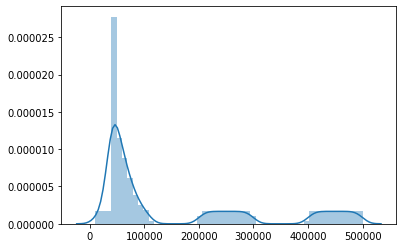

In [14]:
#distribution plot to show the salaries and employee number
sns.distplot(spark.sql("select emp_no, salary from salaries").toPandas())
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


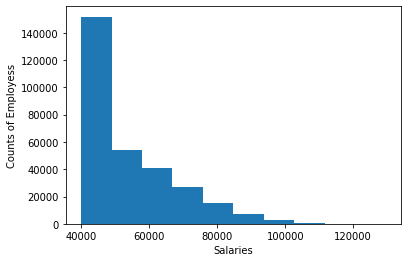

In [15]:
#histogram to show the salaries
plt.hist(spark.sql("select salary from salaries").toPandas().values)
plt.xlabel('Salaries')
plt.ylabel('Counts of Employess')
plt.show()

Bar graph to show the average salary per title with respect to designation

In [16]:
#converting sapark dataframe to pandas dataframe
avg_salary = spark.sql("select t1.title, avg(t3.salary) as average_salary from titles t1 inner join employees t2 on t1.title_id = t2.emp_title_id inner join salaries t3 on t2.emp_no=t3.emp_no group by t1.title order by average_salary").toPandas()


In [17]:
avg_salary

,title,average_salary
0,Senior Engineer,48506.799871
1,Engineer,48535.336511
2,Assistant Engineer,48564.434447
3,Technique Leader,48582.896092
4,Manager,51531.041667
5,Staff,58465.382850
6,Senior Staff,58550.172704


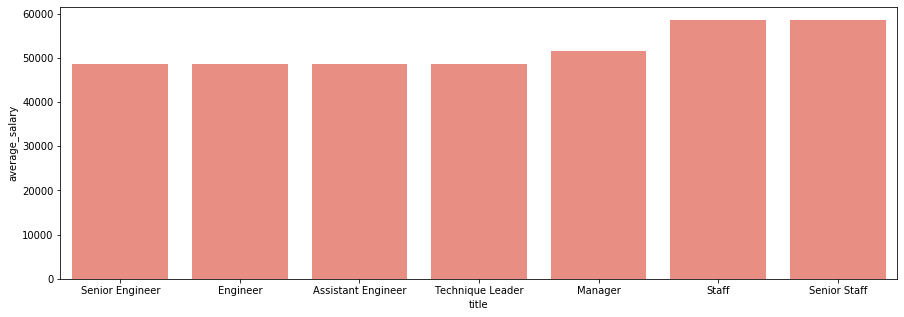

In [18]:
plt.figure(figsize=(15, 5)) 
sns.barplot(x = avg_salary.title, y = avg_salary.average_salary, color = 'salmon')
plt.show()

Calculate employee tenure & show the tenure distribution among the employees.

 Gender distribution of employees

In [19]:
spark.sql(" SELECT sex as gender , COUNT(emp_no) FROM employees GROUP BY sex").show()

+------+-------------+
|gender|count(emp_no)|
+------+-------------+
|     F|       120051|
|     M|       179973|
|   sex|            0|
+------+-------------+



Average salary of employees based on gender.

In [20]:
spark.sql("""select employees.sex as gender, avg(salaries.salary) as average_salary from employees join salaries on employees.emp_no = salaries.emp_no group by employees.sex""").show()

+------+------------------+
|gender|    average_salary|
+------+------------------+
|     F|  52953.8364278515|
|     M|52982.002944886175|
+------+------------------+



Number of employees according to desingnation.

In [21]:
spark.sql("SELECT titles.title, COUNT(employees.emp_no)  FROM titles JOIN employees ON titles.title_id = employees.emp_title_id GROUP BY(titles.title)").show()

+------------------+-------------+
|             title|count(emp_no)|
+------------------+-------------+
|             Staff|       107384|
|Assistant Engineer|         5835|
|      Senior Staff|        26583|
|   Senior Engineer|        97747|
|          Engineer|        47303|
|           Manager|           24|
|  Technique Leader|        15148|
+------------------+-------------+



Highest paid employees in the organization.

In [22]:
spark.sql("select employees.first_name, employees.last_name, sum(salaries.salary) from employees left join salaries on employees.emp_no = salaries.emp_no group by employees.first_name, employees.last_name order by sum(salaries.salary) desc").show()

+------------+-------------+-----------+
|  first_name|    last_name|sum(salary)|
+------------+-------------+-----------+
|    Mohammad|       Ullian|     267002|
|      Bartek|      Garnier|     259201|
|     Rosalyn|       Baalen|     257234|
|    Radoslaw|         Pfau|     254066|
|         Gad|        Krone|     251992|
|      Divine|      Ebeling|     248562|
|        Iara|      Breugel|     246766|
|        Eben|    Francisci|     243202|
|    Yonghong|      Codenie|     241874|
|     Zongyan|      DiGiano|     241645|
|   Laurentiu|     Cesareni|     239415|
| Constantijn|     Pramanik|     236752|
|    Yuichiro|      Brendel|     235377|
|    Branimir|     Griswold|     235302|
|    Jasminko|        Junot|     234801|
|      Jaques|       Zaiane|     233109|
|Sivanarayana|Chandrasekhar|     230977|
|    Jasminko|   Goldhammer|     230706|
|     Martijn|   Besancenot|     230697|
|        Marc|       Stille|     228853|
+------------+-------------+-----------+
only showing top

Count of employees based on their performance rating.

In [23]:
spark.sql("SELECT Last_performance_rating , COUNT(emp_no) FROM employees  Group BY last_performance_rating").show()

+-----------------------+-------------+
|Last_performance_rating|count(emp_no)|
+-----------------------+-------------+
|   Last_performance_...|            0|
|                      B|       107154|
|                      C|        71304|
|                      A|        95919|
|                      S|        10542|
|                    PIP|        15105|
+-----------------------+-------------+

